# Baby weight prediction model design

We are going to design and develop Prediction by using Machine learning.


# Step 1. Explore data

The data is natality data (record of births in the US). My goal is to predict the baby's weight given a number of factors about the pregnancy and the baby's mother. Later, we will want to split the data into training and eval datasets. The hash of the year-month will be used for that.

In [6]:
query="""
SELECT
  weight_pounds,
  is_male,
  mother_age,
  mother_race,
  plurality,
  gestation_weeks,
  mother_married,
  ever_born,
  cigarette_use,
  alcohol_use,
  FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING))) AS hashmonth
FROM
  publicdata.samples.natality
WHERE year > 2000
"""

In [7]:
import google.datalab.bigquery as bq
df = bq.Query(query + " LIMIT 100").execute().result().to_dataframe()
df.head()

,weight_pounds,is_male,mother_age,mother_race,plurality,gestation_weeks,mother_married,ever_born,cigarette_use,alcohol_use,hashmonth
0,6.686620,False,22,1,1,38.0,False,1,None,False,-5742197815970064689
1,7.634608,False,23,1,1,43.0,False,2,None,False,-2126480030009879160
2,8.313632,False,22,1,1,39.0,False,2,None,False,-1403073183891835564
3,8.600233,False,23,1,1,41.0,False,1,None,None,5896567601480310696
4,6.759373,False,32,1,1,38.0,True,2,None,False,-7146494315947640619


## Investigate mother race and baby weight

In [9]:
def get_distinct_values(column_name):
  sql = """
SELECT
  {0},
  COUNT(1) AS num_babies,
  AVG(weight_pounds) AS avg_wt
FROM
  publicdata.samples.natality
WHERE
  year > 2000
GROUP BY
  {0}
  """.format(column_name)
  return bq.Query(sql).execute().result().to_dataframe()

df = get_distinct_values('mother_race')
df.head()

,mother_race,num_babies,avg_wt
0,5.0,48007,7.006103
1,4.0,203698,7.209755
2,58.0,2358,7.265069
3,7.0,186428,7.018869
4,48.0,82518,7.020517


column_name is parametized variable for query. It will be passed to BQ SQL as a {0} and you can reuse query with dynamic parameter

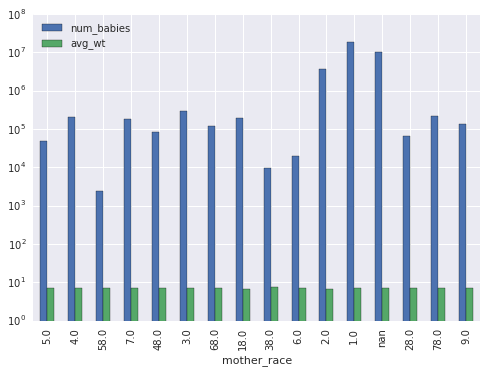

In [10]:
df.plot(x='mother_race', logy='num_babies', kind='bar');

## Investigate relationship baby weight and gender


In [16]:
df = get_distinct_values('is_male')
df.head()

,is_male,num_babies,avg_wt
0,False,16245054,7.104715
1,True,17026860,7.349797


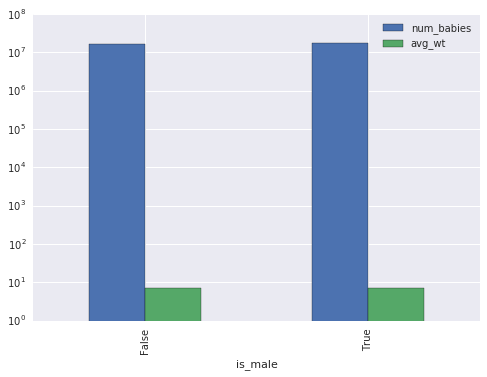

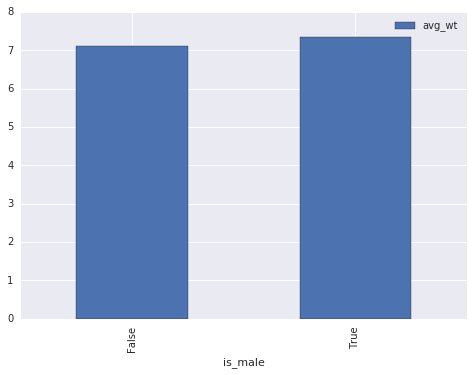

In [15]:
df.plot(x='is_male', logy='num_babies', kind='bar');
df.plot(x='is_male', y='avg_wt', kind='bar');

## Investigate relationship between mother's age and baby weight

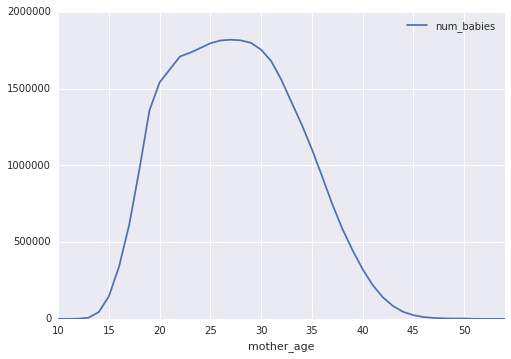

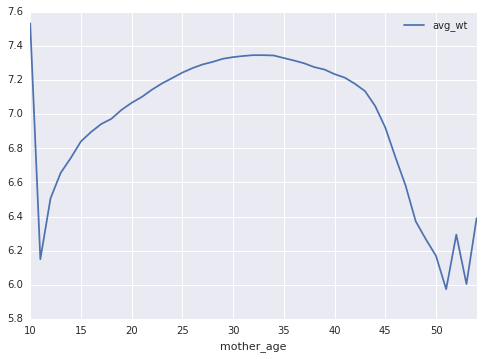

In [19]:
df = get_distinct_values('mother_age')
df = df.sort_values('mother_age')
df.plot(x='mother_age', y='num_babies');
df.plot(x='mother_age', y='avg_wt');

## investigate relation between plurality and baby weight

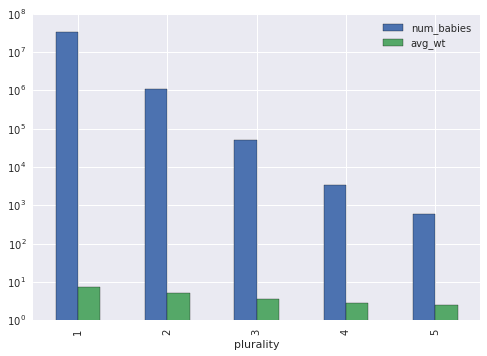

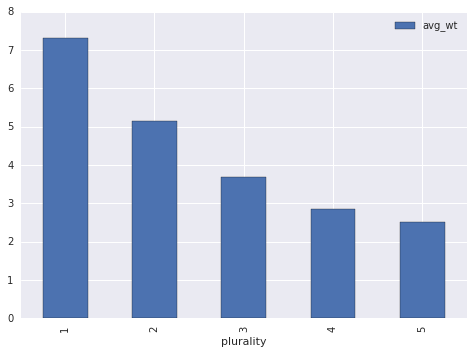

In [20]:
df = get_distinct_values('plurality')
df = df.sort_values('plurality')
df.plot(x='plurality', logy='num_babies', kind='bar');
df.plot(x='plurality', y='avg_wt', kind='bar');

## investigate relation between gestation week and babyweight 

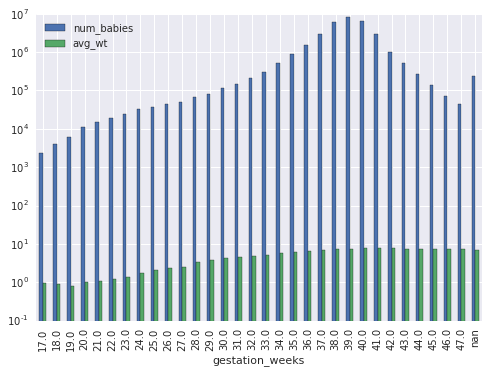

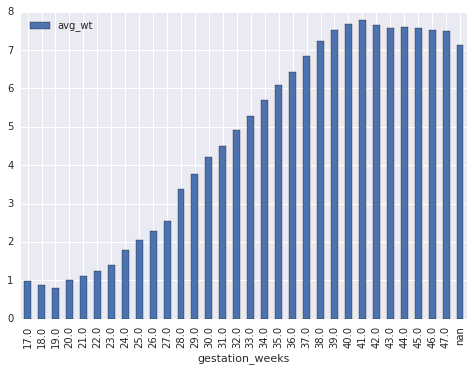

In [21]:
df = get_distinct_values('gestation_weeks')
df = df.sort_values('gestation_weeks')
df.plot(x='gestation_weeks', logy='num_babies', kind='bar');
df.plot(x='gestation_weeks', y='avg_wt', kind='bar');

## investigate relation between mother_married and baby weight

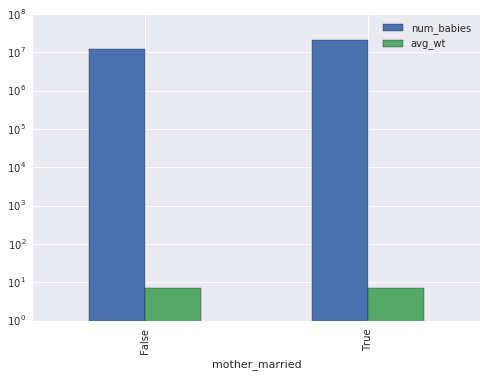

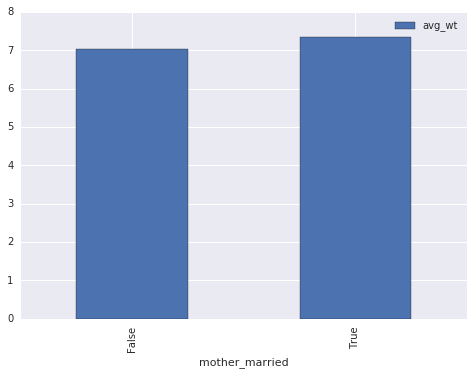

In [22]:
df = get_distinct_values('mother_married')
df.plot(x='mother_married', logy='num_babies', kind='bar');
df.plot(x='mother_married', y='avg_wt', kind='bar');

## investigate relationshop between ever_born and baby weight

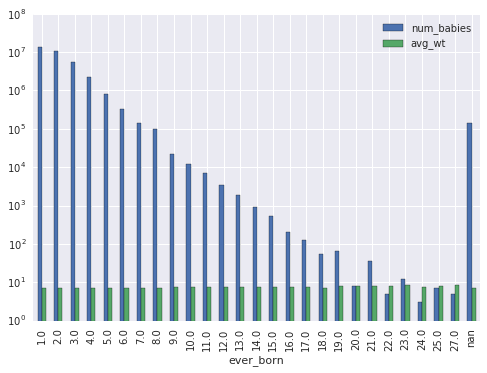

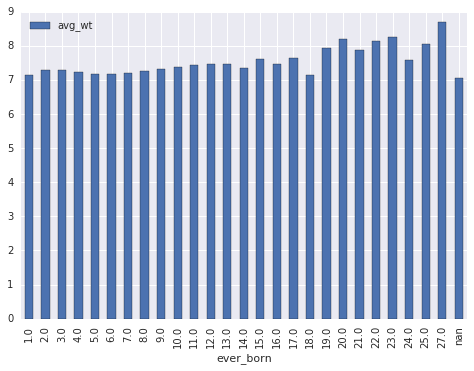

In [23]:
df = get_distinct_values('ever_born')
df = df.sort_values('ever_born')
df.plot(x='ever_born', logy='num_babies', kind='bar');
df.plot(x='ever_born', y='avg_wt', kind='bar');